
## **Task 2**

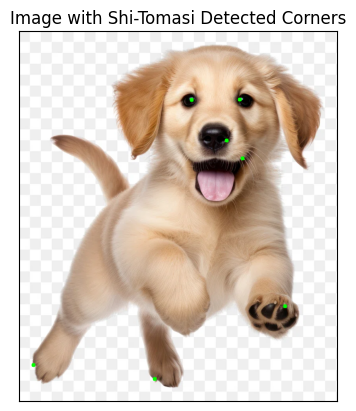

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('dog.webp')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

max_corners = 90
quality_level = 0.25
min_distance = 20
corners = cv2.goodFeaturesToTrack(gray_image, max_corners, quality_level, min_distance)
corners = np.int0(corners)
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(image, (x, y), 5, (0, 255, 0), -1)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image with Shi-Tomasi Detected Corners')
plt.xticks([]), plt.yticks([])
plt.show()

## **Task 1**

In [2]:
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
width = 600
height = 580

image = cv2.imread('tumor.jpg', cv2.IMREAD_GRAYSCALE)
if image is not None:
    image = cv2.resize(image, (width, height))
else:
    print("Error: Unable to load the image.")

image = cv2.GaussianBlur(image, (5, 5), 0)
edges = cv2.Canny(image, 50, 150)
_, binary_image = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY)
kernel = np.ones((5, 5), np.uint8)
binary_image = cv2.dilate(binary_image, kernel, iterations=1)
binary_image = cv2.erode(binary_image, kernel, iterations=1)
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
min_area_threshold = 100
potential_tumor_regions = []

for contour in contours:
    if cv2.contourArea(contour) > min_area_threshold:
        x, y, w, h = cv2.boundingRect(contour)
        roi = image[y:y+h, x:x+w]
        potential_tumor_regions.append((roi, 1))

for i in range(len(potential_tumor_regions)):
    x = np.random.randint(0, width - 64)
    y = np.random.randint(0, height - 128)
    roi = image[y:y+128, x:x+64]
    potential_tumor_regions.append((roi, 0))

hog_features = []
labels = []
for roi, label in potential_tumor_regions:
    roi = cv2.resize(roi, (64, 128))
    fd = hog(roi, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
    hog_features.append(fd)
    labels.append(label)

X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Certainly, here's a rephrased description of how both edge detection and texture analysis can be applied for tumor detection in mammograms:

**Edge Detection for Tumor Detection in Mammograms**

Edge detection is a fundamental technique used in image processing to identify abrupt intensity changes in images, which often correspond to object boundaries. In the context of mammogram analysis, detecting edges can be crucial in pinpointing significant structures or anomalies like tumors. Here is a stepwise approach to utilizing edge detection for tumor detection in mammograms:

**Preprocessing:**

1. Initiate by performing preprocessing tasks on the mammogram images. These tasks aim to improve image quality and reduce noise. Common preprocessing techniques include denoising, enhancing contrast, and resizing.

**Grayscale Conversion:**

2. Convert the preprocessed mammogram image into grayscale since edge detection is typically applied to grayscale images.

**Edge Detection:**

3. Apply edge detection algorithms such as Canny Edge Detector, Sobel, or Prewitt to identify edges within the mammogram image. These algorithms excel in highlighting areas with sharp intensity changes, often corresponding to potential tumor boundaries.

**Thresholding:**

4. Employ thresholding on the edge-detected image to accentuate significant edges while reducing noise. This results in a binary image that highlights potential regions where tumors might be located.

**Post-processing:**

5. Implement post-processing techniques such as morphological operations (dilation, erosion) and contour detection to refine and extract tumor regions from the binary image.

**Tumor Detection:**

6. Analyze the refined regions to identify potential tumor locations based on predetermined criteria like size, shape, or other relevant factors.

**Texture Analysis for Tumor Detection**

Texture analysis is another potent feature extraction method that can enhance tumor detection in medical images. This technique involves examining patterns and variations in pixel intensities across an image. For tumor detection, texture analysis can be instrumental in identifying areas with irregular textures, which are often indicative of tumors. Here's an outline of how to employ texture analysis for this purpose:

**Preprocessing:**

1. Begin with preprocessing steps to enhance the overall image quality, similar to the edge detection process.

**Texture Feature Extraction:**

2. Utilize texture analysis algorithms like Gray-Level Co-occurrence Matrix (GLCM), Local Binary Patterns (LBP), or Gabor filters to extract texture features from the preprocessed image.

**Feature Representation:**

3. Represent the extracted texture features within a feature space. Commonly used feature spaces encompass histograms, statistical measures, or transformed spaces like Principal Component Analysis (PCA).

**Classification:**

4. Employ classification algorithms such as Support Vector Machines (SVM), Random Forest, or Convolutional Neural Networks (CNN) to categorize the extracted texture features into tumor and non-tumor regions.

By combining these techniques, medical professionals can enhance their ability to detect tumors in mammogram images with improved accuracy and reliability.

## **Task 2**

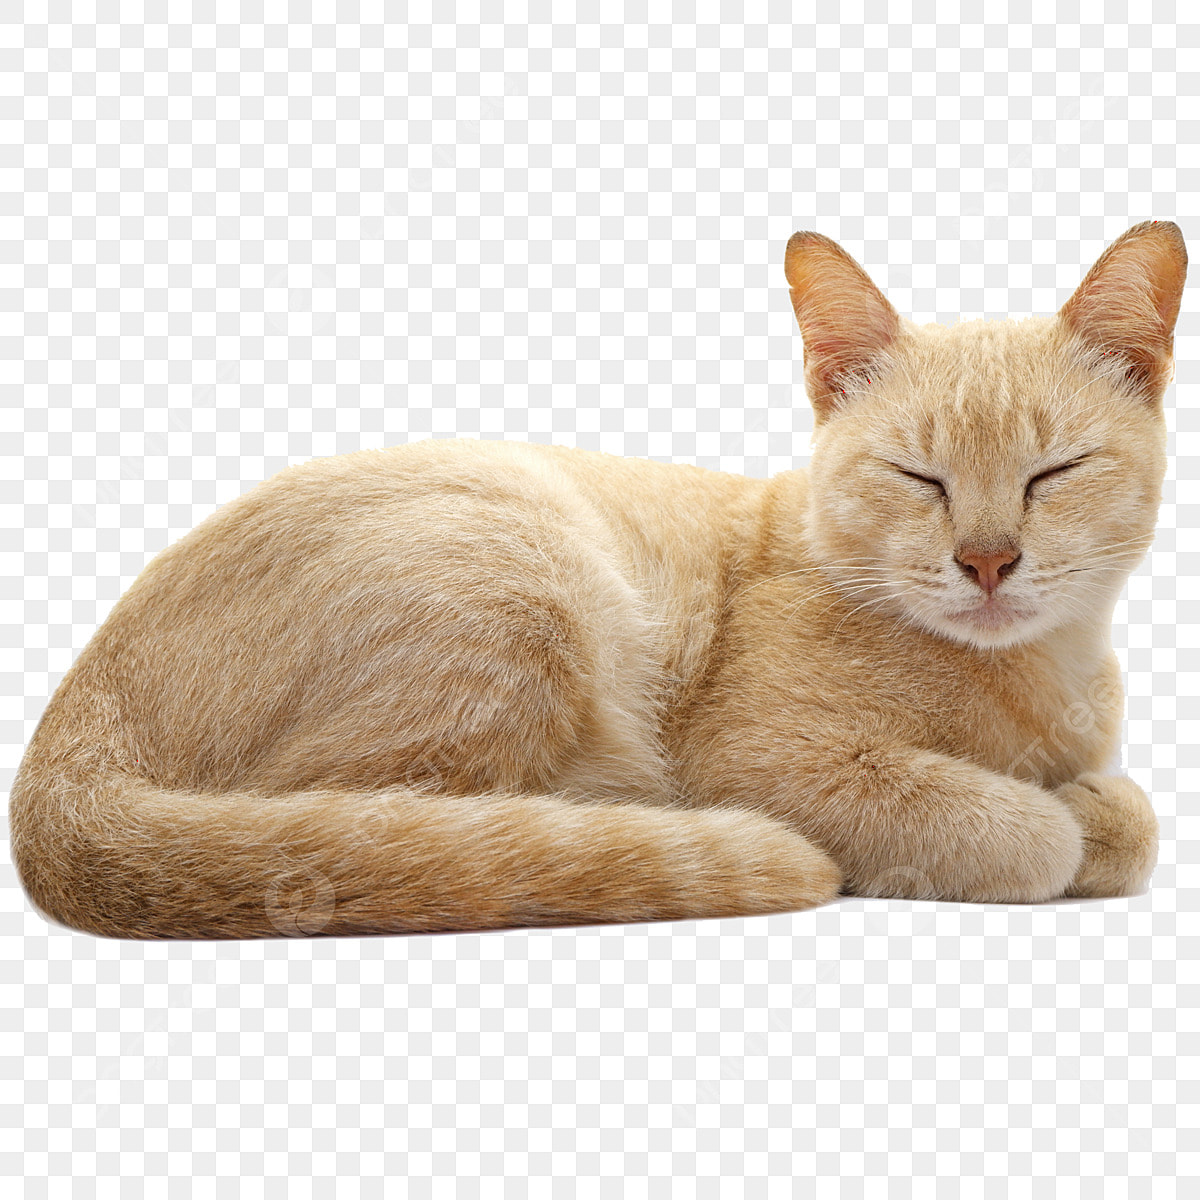

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
image = cv2.imread('cat.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
dst = cv2.cornerHarris(gray_image, blockSize=2, ksize=3, k=0.04)
threshold = 0.1 * dst.max()
corners = np.where(dst > threshold)
image[corners] = [0, 0, 255]
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


## **Task 3**

In [7]:
def corners(video_capture):
    while True:
        ret, frame = video_capture.read()
        if not ret:
            print("Unable to capture video.")
            break
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        corner_response = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
        threshold = 0.02
        corner_points = np.argwhere(corner_response > threshold * corner_response.max())
        corner_points = corner_points.reshape(-1, 2)
        for point in corner_points:
            x, y = point
            cv2.circle(frame, (x, y), 3, (0, 0, 255), -1)
        cv2.imshow('Corner Detection in Real-time Video', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    video_capture.release()
    cv2.destroyAllWindows()
video_capture = cv2.VideoCapture(0)
if not video_capture.isOpened():
    print("Unable to access the webcam.")
else:
    corners(video_capture)

Unable to access the webcam.


## **Task 4**

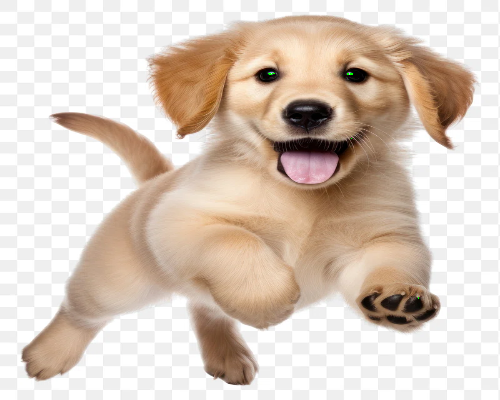

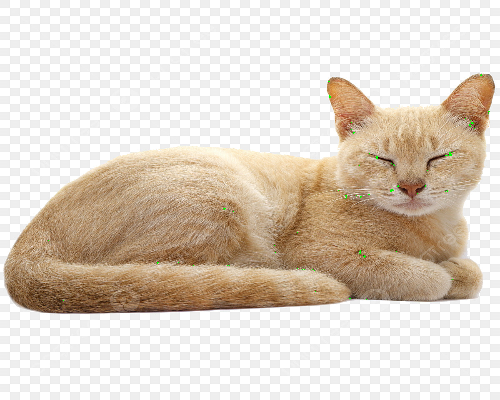

In [10]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
def detect_corners(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    corners = cv2.cornerHarris(gray_image, blockSize=2, ksize=3, k=0.04)
    threshold = 0.1 * corners.max()
    corners = np.where(corners > threshold)
    image_with_corners = image.copy()
    image_with_corners[corners] = [0, 255, 0]
    return image_with_corners

img1 = cv2.imread('dog.webp')
img2 = cv2.imread('cat.jpg')
h, w = 400, 500
img1_resized = cv2.resize(img1, (w, h))
img2_resized = cv2.resize(img2, (w, h))
img1_corners = detect_corners(img1_resized)
img2_corners = detect_corners(img2_resized)
cv2_imshow(img1_corners)
cv2_imshow(img2_corners)

## **Task 5**

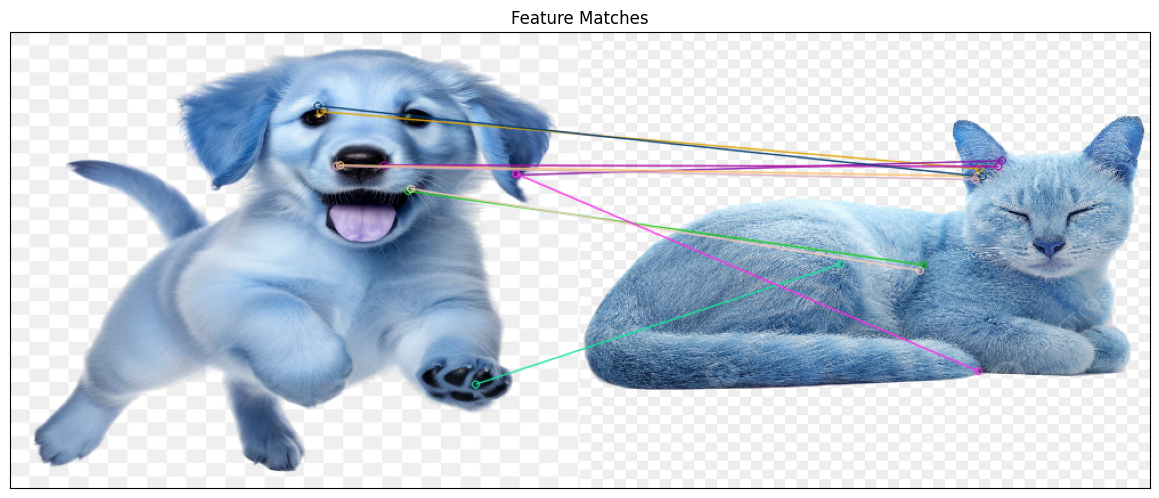

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
orb = cv2.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(img1_resized, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2_resized, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)
matched_image = cv2.drawMatches(img1_resized, keypoints1, img2_resized, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(50, 30))
plt.subplot(133), plt.imshow(matched_image)
plt.title('Feature Matches'), plt.xticks([]), plt.yticks([])
plt.show()